In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")

%matplotlib inline

### How many SLiMs overlap IDRs?

In [2]:
names = ['uniprot', 'slim_start', 'slim_end', 'slim_accession', 'slim_ELMType', 'slim_ELMIdentifier', 'tmp', 'idr_start', 'idr_end', 'overlap']
df_slims_to_idrs = pd.read_csv("../results/intersections/elm_to_idrs.tsv", sep="\t", header=None, names=names).drop('tmp', axis =1 ).drop_duplicates()

df_slims_to_idrs


,uniprot,slim_start,slim_end,slim_accession,slim_ELMType,slim_ELMIdentifier,idr_start,idr_end,overlap
0,A2VCK8,3,21,ELMI001654,LIG,LIG_Actin_WH2_2,-1,-1,0
1,A5D8V6,202,209,ELMI002658,LIG,LIG_EF_ALG2_ABM_1,159,355,7
2,A6NGB9,420,430,ELMI002697,LIG,LIG_WH1,-1,-1,0
3,A9UF02,115,122,ELMI002050,DOC,DOC_ANK_TNKS_1,-1,-1,0
4,B9EIS4,18,24,ELMI001419,MOD,MOD_PKA_2,-1,-1,0
...,...,...,...,...,...,...,...,...,...
2206,Q9Y6V0,4269,4275,ELMI003084,DOC,DOC_MAPK_JIP1_4,-1,-1,0
2207,Q9Y6W5,437,453,ELMI001661,LIG,LIG_Actin_WH2_1,-1,-1,0
2208,Q9Y6W6,19,25,ELMI003078,DOC,DOC_MAPK_JIP1_4,-1,-1,0
2209,Q9Y6X2,446,451,ELMI002800,LIG,LIG_SUMO_SIM_par_1,-1,-1,0


In [3]:
df_slims_to_idrs.assign(overlaps_idr=lambda x: x.overlap > 0).groupby('overlaps_idr').size()

overlaps_idr
False    1293
True      772
dtype: int64

In [30]:
df_slims_to_idrs.query("overlap > 0").to_csv("../results/SLiM_IDR_overlaps.tsv", sep="\t", index=False)

### How many STRs overlap IDRs?

In [4]:
names = ['uniprot', 'str_start', 'str_end', 'str_protein_seq', 'str_gen_seq', 'tmp', 'idr_start', 'idr_end', 'overlap']
df_strs_to_idrs = pd.read_csv("../results/intersections/prot_strs_to_idrs.tsv", sep="\t", header=None, names=names).drop('tmp', axis =1 ).drop_duplicates()

df_strs_to_idrs

,uniprot,str_start,str_end,str_protein_seq,str_gen_seq,idr_start,idr_end,overlap
0,A0A096LP55,17,25,"E,E,E,E,E,E,E,E,E",TTCCTCCTCTTCCTCTTCCTCCTCCTC,1,30,8
1,A0AV96,489,502,"A,A,A,A,A,A,A,A,A,A,A,A,A,A",AGCGGCTGCGGCGGCTGCGGCCGCGGCTGCGGCGGCAGCAGC,-1,-1,0
2,A0AV96,559,564,"A,A,A,A,A,A",GGCGGCCGCGGCTGCCGC,-1,-1,0
3,A0JLT2,28,35,"P,P,P,P,P,P,P,P",AGGAGGCGGTGGCGGGGGTGGAGG,1,56,7
4,A0MZ66,353,361,"P,P,P,P,P,P,P,P,P",TGGTGGTGGAGGAGGAGGTGGTGGAGG,343,511,8
...,...,...,...,...,...,...,...,...
2355,Q9Y6U7,12,20,"P,P,P,P,P,P,P,P,P",CGGAGGCGGCGGCGGAGGCGGCGGCGG,1,22,8
2356,Q9Y6V0,17,22,"A,A,A,A,A,A",AGCCGCTGCGGCCGCCGC,1,154,5
2357,Q9Y6W5,333,338,"P,P,P,P,P,P",AGGCGGTGGTGGAGGTGG,240,435,5
2358,Q9Y6W5,364,371,"P,P,P,P,P,P,P,P",TGGTGGTGGAGGAGGAGGTGGAGG,240,435,7


In [5]:
df_strs_to_idrs.assign(overlaps_idr=lambda x: x.overlap > 0).groupby('overlaps_idr').size()

overlaps_idr
False     841
True     1449
dtype: int64

In [31]:
df_strs_to_idrs.query("overlap > 0").to_csv("../results/homorepeats_IDR_overlaps.tsv", sep="\t", index=False)

### How many STRs are close to SLiMs? (within 10 aa of eachother)

In [6]:
names = ['uniprot', 'str_start', 'str_end', 'str_protein_seq', 'str_gen_seq', 'tmp', 'slim_start', 'slim_end', 'slim_accession', 'slim_ELMType', 'slim_ELMIdentifier', 'overlap']
df_strs_to_slims = (
    pd.read_csv("../results/intersections/prot_strs_wider_to_elm.tsv", header=None, sep="\t", names=names)
        .drop(['tmp', 'overlap'], axis =1 )
        .drop_duplicates()
)


In [7]:
df_strs_to_slims[df_strs_to_slims['slim_start'] != -1].assign(str_start = lambda x: x.str_start + 10, str_end = lambda x: x.str_end - 10).reset_index(drop=True)


,uniprot,str_start,str_end,str_protein_seq,str_gen_seq,slim_start,slim_end,slim_accession,slim_ELMType,slim_ELMIdentifier
0,P17676,162,170,"P,P,P,P,P,P,P,P,P",CCACCGCCCCCGCCGCCGCCGCCGCCC,173,176,ELMI000857,MOD,MOD_SUMO_for_1
1,P24385,272,280,"E,E,E,E,E,E,E,E,E",GAGGAGGAGGAAGAGGAGGAGGAGGAG,289,295,ELMI004149,DEG,DEG_SCF_FBXO31_1
2,P30291,34,43,"E,E,E,E,E,E,E,E,E,E",GAGGAGGAGGAAGAAGAGGAGGAGGAGGAG,50,56,ELMI003377,MOD,MOD_Plk_1
3,P50616,249,256,"P,P,P,P,P,P,P,P",TGGTGGTGGTGGTGGCGGTGGCGG,265,277,ELMI001611,LIG,LIG_PAM2_1
4,P50616,257,262,"Q,Q,Q,Q,Q,Q",CTGCTGTTGTTGCTGCTG,265,277,ELMI001611,LIG,LIG_PAM2_1
5,P61978,289,294,"P,P,P,P,P,P",GGGAGGAGGGGGAGGTGG,297,301,ELMI003469,MOD,MOD_PRMT_GGRGG_1
6,P61978,310,315,"P,P,P,P,P,P",AGGTGGTGGTGGTGGAGG,297,301,ELMI003469,MOD,MOD_PRMT_GGRGG_1
7,Q14318,36,46,"E,E,E,E,E,E,E,E,E,E,E",CTCTTCCTCCTCTTCCTCCTCCTCTTCCTCCTC,23,30,ELMI004466,LIG,LIG_LIR_Gen_1
8,Q14318,36,46,"E,E,E,E,E,E,E,E,E,E,E",CTCTTCCTCCTCTTCCTCCTCCTCTTCCTCCTC,52,56,ELMI002479,LIG,LIG_MYND_3
9,Q15942,94,99,"P,P,P,P,P,P",CCGCCGCCCCCTCCCCCG,93,97,ELMI001691,LIG,LIG_EVH1_1


In [32]:
df_strs_to_slims[df_strs_to_slims['slim_start'] != -1].assign(str_start = lambda x: x.str_start + 10, str_end = lambda x: x.str_end - 10).to_csv("../results/homorepeats_SLiM_proximity.tsv", sep="\t", index=False)


### IDR-based statistics

In [8]:
df_idrs = pd.read_csv("../data/reformat/swissprot_intrinsic_disorder_mapping_reformat.tsv", sep="\t")
df_idrs = df_idrs.drop_duplicates().reset_index(drop=True)
df_idrs.head()

,uniprot,start,end
0,A0A075B6H9,73,92
1,A0A075B6J9,20,52
2,A0A075B6Y9,1,20
3,A0A087WSX0,68,92
4,A0A087WUL8,1047,1085


In [9]:
df_idrs = (df_idrs
     .merge(df_slims_to_idrs.query("idr_start > 0").groupby(['uniprot', 'idr_start'], as_index=False).size().rename(columns={"size": "n_slims"}), left_on=['uniprot', 'start'], 
            right_on=['uniprot', 'idr_start'], how="left")
     .fillna(0)
     .drop('idr_start', axis=1)
)


In [10]:
df_idrs = (df_idrs
     .merge(df_strs_to_idrs.query("idr_start > 0").groupby(['uniprot', 'idr_start'], as_index=False).size().rename(columns={"size": "n_strs"}), left_on=['uniprot', 'start'], 
            right_on=['uniprot', 'idr_start'], how="left")
     .fillna(0)
     .drop('idr_start', axis=1)
     .astype({"n_slims": int, "n_strs": int})
)

df_idrs.head()

,uniprot,start,end,n_slims,n_strs
0,A0A075B6H9,73,92,0,0
1,A0A075B6J9,20,52,0,0
2,A0A075B6Y9,1,20,0,0
3,A0A087WSX0,68,92,0,0
4,A0A087WUL8,1047,1085,0,0


### A closer look at some IDRs that have both STRs and SLiMs

Looks like this mostly happens in IDRs that are long, where SliMs and STRs can 'dodge' eachother easily.

In [11]:
df_idrs.query("n_slims > 0 and n_strs > 0").head()

,uniprot,start,end,n_slims,n_strs
2355,O43516,1,503,3,4
2643,O60341,1,176,2,1
2727,O60583,497,652,1,2
3061,O75385,283,358,1,1
3283,O76039,646,834,1,1


In [12]:
uniprot = 'O43516'
idr_start = 1
df_strs_to_idrs.query(f"uniprot == '{uniprot}' and idr_start == {idr_start}")


,uniprot,str_start,str_end,str_protein_seq,str_gen_seq,idr_start,idr_end,overlap
194,O43516,81,90,"G,G,G,G,G,G,G,G,G,G",TCCACCGCCTCCGCCACCACCTCCTCCGCC,1,503,9
195,O43516,264,270,"P,P,P,P,P,P,P",TGGAGGAGGTGGTGGAGGGGG,1,503,6
196,O43516,307,313,"P,P,P,P,P,P,P",GGGAGGTGGCGGCGGAGGTGG,1,503,6
197,O43516,428,433,"P,P,P,P,P,P",TGGTGGAGGTGGGGGAGG,1,503,5


In [13]:
df_slims_to_idrs.query(f"uniprot == '{uniprot}' and idr_start == {idr_start}")


,uniprot,slim_start,slim_end,slim_accession,slim_ELMType,slim_ELMIdentifier,idr_start,idr_end,overlap
119,O43516,33,49,ELMI001659,LIG,LIG_Actin_WH2_1,1,503,16
120,O43516,451,461,ELMI002695,LIG,LIG_WH1,1,503,10
121,O43516,454,466,ELMI001705,LIG,LIG_EVH1_3,1,503,12


### Some correlations/statistics

In [14]:
from scipy import stats

In [15]:
df_idrs.assign(length=lambda x: x.end - x.start + 1)[['n_slims', 'n_strs', 'length']].describe()

,n_slims,n_strs,length
count,26259.000000,26259.000000,26259.000000
mean,0.029399,0.055181,62.048974
std,0.254542,0.269070,83.697900
min,0.000000,0.000000,20.000000
25%,0.000000,0.000000,26.000000
50%,0.000000,0.000000,39.000000
75%,0.000000,0.000000,68.000000
max,19.000000,7.000000,4099.000000


### Length distribution of IDRs, seems to decay exponentially (more or less)

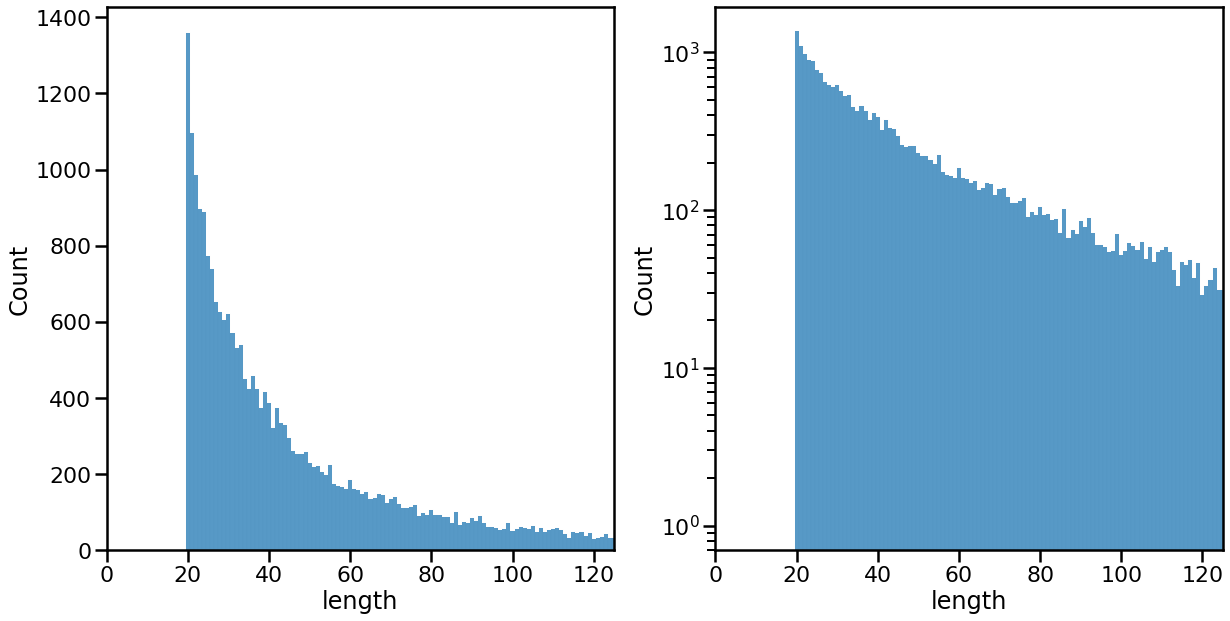

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(
    df_idrs.assign(length=lambda x: x.end - x.start + 1),
    x="length",
    discrete=True,
    ax=axes[0]
).set(xlim=(0, 125))

sns.histplot(
    df_idrs.assign(length=lambda x: x.end - x.start + 1),
    x="length",
    discrete=True,
    ax=axes[1]
).set(xlim=(0, 125), yscale='log')

plt.show()

In [17]:
df_idrs

,uniprot,start,end,n_slims,n_strs
0,A0A075B6H9,73,92,0,0
1,A0A075B6J9,20,52,0,0
2,A0A075B6Y9,1,20,0,0
3,A0A087WSX0,68,92,0,0
4,A0A087WUL8,1047,1085,0,0
...,...,...,...,...,...
26254,Q9Y6Z7,40,107,0,0
26255,Q9YNA8,170,189,0,0
26256,Q9YNA8,223,264,0,0
26257,Q9YNA8,598,640,0,0


In [18]:
res = stats.ttest_ind(
    df_idrs.assign(length=lambda x: x.end - x.start + 1)[(df_idrs.n_slims > 0)]["length"],
    df_idrs.assign(length=lambda x: x.end - x.start + 1)[~(df_idrs.n_slims > 0) | (df_idrs.n_strs > 0)]["length"]
)
print(f"Length of IDRs with STRs vs. length of IDRs without STR or SLiM:\n{res}\n")

res = stats.ttest_ind(
    df_idrs.assign(length=lambda x: x.end - x.start + 1)[(df_idrs.n_strs > 0)]["length"],
    df_idrs.assign(length=lambda x: x.end - x.start + 1)[~(df_idrs.n_slims > 0) | (df_idrs.n_strs > 0)]["length"]
)
print(f"Length of IDRs with SLiM vs. length of IDRs without STR or SLiM:\n{res}")


Length of IDRs with STRs vs. length of IDRs without STR or SLiM:
Ttest_indResult(statistic=7.006319211384412, pvalue=2.5056405793693866e-12)

Length of IDRs with SLiM vs. length of IDRs without STR or SLiM:
Ttest_indResult(statistic=20.1194067610853, pvalue=2.261160349294589e-89)


### Group IDRs based on how many SLiMs they contain

For every one of these categories, determine how many STRs are present (min, max, mean, std)

In [19]:
tmp = df_idrs.drop(['start', 'end', 'uniprot'], axis=1).groupby('n_slims', as_index=False).agg(['size', 'min', 'max', 'mean', 'std'])
tmp.columns = ['n_observations', 'min_n_strs', 'max_n_strs', 'mean_n_strs', 'std']
tmp.reset_index()


,n_slims,n_observations,min_n_strs,max_n_strs,mean_n_strs,std
0,0,25686,0,7,0.054465,0.265812
1,1,469,0,2,0.066098,0.288494
2,2,54,0,4,0.222222,0.718139
3,3,32,0,4,0.156250,0.723316
4,4,9,0,1,0.111111,0.333333
5,5,5,0,1,0.200000,0.447214
6,6,2,0,0,0.000000,0.000000
7,7,1,0,0,0.000000,NaN
8,19,1,0,0,0.000000,NaN


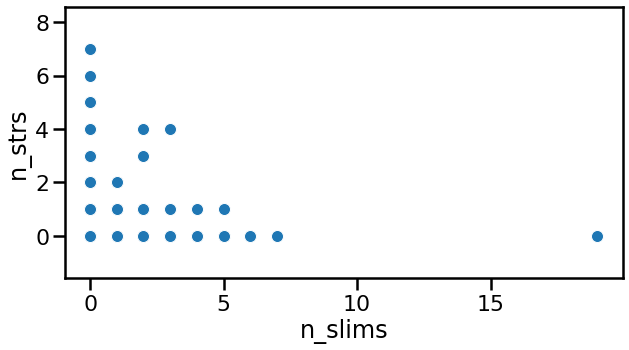

In [20]:
fig = plt.figure(figsize=(10, 5))

ax = sns.scatterplot(
    data=df_idrs,
    x="n_slims",
    y="n_strs"
)

ax.axis('equal')

plt.show()

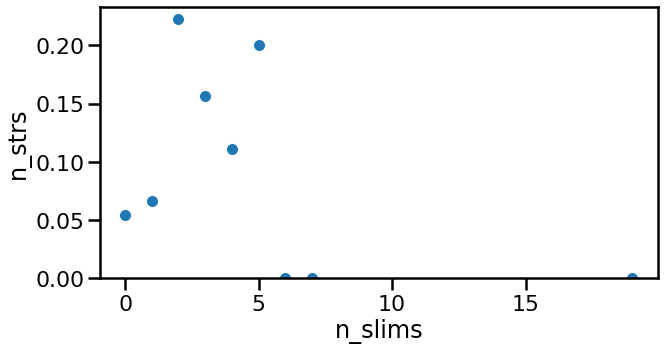

In [21]:
fig = plt.figure(figsize=(10, 5))

ax = sns.scatterplot(
    data=df_idrs.astype({"n_slims": int, "n_strs": int}).groupby('n_slims', as_index=False).mean(),
    x="n_slims",
    y="n_strs"
)


# ax.axis('equal')
ax.set(ylim=(0, None))

plt.show()

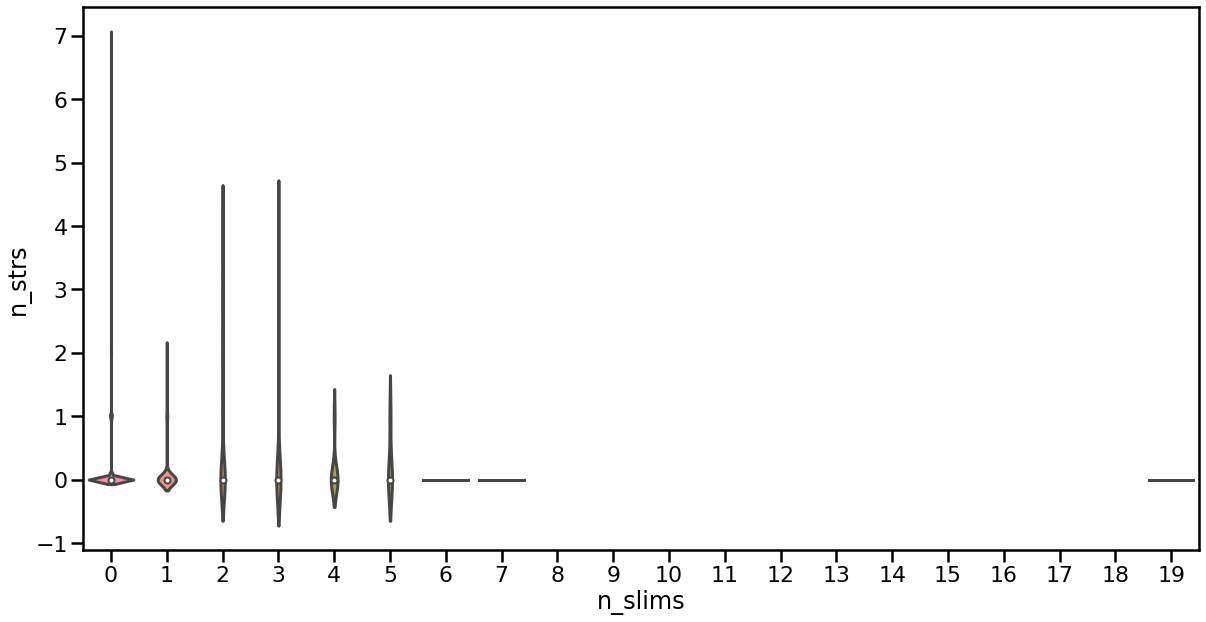

In [22]:
fig = plt.figure(figsize=(20, 10))

ax = sns.violinplot(
    data=df_idrs,
    x="n_slims",
    y="n_strs",
    order=range(0, 20)
)

plt.show()

In [23]:
stats.pearsonr(
    x=df_idrs.n_strs, 
    y=df_idrs.n_slims
)


(0.020240302405586167, 0.001037902551163931)

### Very few cases where STRs occur in the same IDR as SLiMs

In [24]:
df_idrs.assign(has_slim = lambda x: x.n_slims > 0, has_str = lambda x: x.n_strs > 0).groupby(['has_slim', 'has_str'], as_index=False).size().pivot(index='has_str', columns='has_slim')


size     
has_slim  False True
has_str             
False     24469  536
True       1217   37

### However, only significant depletion if assuming *a priori* that there should be less SLiMs in STR-containing IDRs

In [25]:
print(stats.fisher_exact(np.matrix([[536, 37], [24469, 1217]]), alternative='two-sided'))
print(stats.fisher_exact(np.matrix([[536, 37], [24469, 1217]]), alternative='less'))


(0.7205057033002596, 0.0597343087903371)
(0.7205057033002596, 0.03967972542722499)


In [26]:
(536 / 24469) / (37 / 1217)

0.7205057033002595

In [27]:
# same with hypergeometric distro of course...

x = 37 ## IDRs >= 1 homorepeat AND >= 1 SLiM
k = 1254 ## IDRs with >= 1 homorepeat
m = 573 ## Number of IDRs with >= 1 SLiM
N = 26259 ## Total number of IDRs

stats.hypergeom(M=N, 
                n=m, 
                N=k).sf(x-1)

0.03967972542722499